In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN

In [3]:
data = pd.read_csv("../data/processed/model_data.csv")

#### Split Data into Training and Test

In [4]:
y = np.ravel(data[['status']].values)
X = data.iloc[:,1:].values

#### Modeling

In [23]:
models = ['KNN', 'SVC', 'NuSVC', 'Bayesian', 'RandomForest']
samples = ['random', 'smote', 'adasyn', 'observed']

In [33]:
def model_fit_score(model, sample, cv):
    if sample == 'random':
        ros = RandomOverSampler(random_state=42)
        X_res, y_res = ros.fit_resample(X, y)
    elif sample == 'smote':
        X_res, y_res = SMOTE().fit_resample(X, y)
    elif sample == 'adasyn':
            X_res, y_res = ADASYN().fit_resample(X, y)
    elif sample == 'observed':
        X_res = X
        y_res = y

    
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                            test_size=0.3, 
                                                            random_state=21, 
                                                            stratify=y_res)
    if model == 'KNN':
        steps = [('knn', KNeighborsClassifier())]
        parameters = {'knn__n_neighbors':np.arange(1,50), 
                      'knn__weights': ['uniform','distance'],
                       'knn__algorithm':['auto','ball_tree','kd_tree','brute']}
    elif model == 'SVC':
        steps = [('svc', SVC())]
        parameters = {'svc__C':np.logspace(-3, 2, 6), 
                      'svc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'NuSVC':
        steps = [('nusvc', NuSVC())]
        parameters = {'nusvc__nu':np.arange(0.1,1, .01),
                      'nusvc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'Bayesian':
        steps = [('bayes', GaussianNB())]
        parameters = {'bayes__var_smoothing': np.logspace(-9,9,19)}
    elif model == 'RandomForest':
        steps = [('rf', RandomForestClassifier())]
        parameters = {'rf__n_estimators': np.arange(10,100,10),
                     'rf__criterion':['gini','entropy'],
                     'rf__max_depth':np.arange(10,100,10)}
        

    pipeline = Pipeline(steps)
    
    cv = GridSearchCV(pipeline, param_grid=parameters, cv=cv)
    
    start_time = time.time()
    
    cv.fit(X_train, np.ravel(y_train))
        
    elapsed_time = time.time() - start_time
    
    print('Evaluation in {:.2f} seconds'.format(elapsed_time))
    
    print(str(model)+" Best params:", cv.best_params_)
    print(str(model)+" Best score:", cv.best_score_)
    
    y_pred = cv.predict(X_test)
    y_train_predict = clfcv.predict(X_train)
    
    print("Training Accuracy: {}%".format(accuracy_score(y_train, y_train_predict, normalize=False)))
    print(classification_report(y_test, y_pred, zero_division=0))
    plot_confusion_matrix(cv, X_test, y_test)
    plt.title(model + " Confusion Matrix")
    plt.show()

#### K-Nearest Neighbors | Original Data

Evaluation in 4.82 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 25, 'knn__weights': 'uniform'}
KNN Best score: 0.5152046783625732
Training Accuracy: 54%
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.00      0.00      0.00         9
           2       0.38      0.53      0.44        15

    accuracy                           0.44        39
   macro avg       0.29      0.38      0.33        39
weighted avg       0.34      0.44      0.38        39



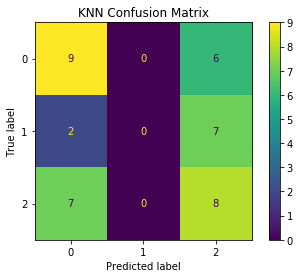

In [34]:
model_fit_score(models[0], samples[3], 5)

#### KNN | Random Oversampling

Evaluation in 5.07 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 31, 'knn__weights': 'distance'}
KNN Best score: 0.5047619047619047
Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        15
           1       0.54      0.47      0.50        15
           2       0.47      0.53      0.50        15

    accuracy                           0.44        45
   macro avg       0.45      0.44      0.44        45
weighted avg       0.45      0.44      0.44        45



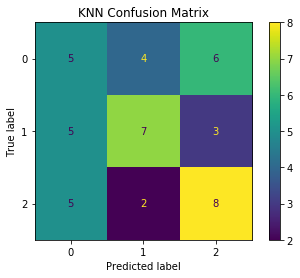

In [36]:
model_fit_score(models[0], samples[0], 5)

#### SVC | Original Data

Evaluation in 2.85 seconds
SVC Best params: {'svc__C': 100.0, 'svc__kernel': 'linear'}
SVC Best score: 0.49298245614035086
Training Accuracy: 54%
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.57      0.44      0.50         9
           2       0.60      0.40      0.48        15

    accuracy                           0.62        39
   macro avg       0.60      0.59      0.58        39
weighted avg       0.61      0.62      0.59        39



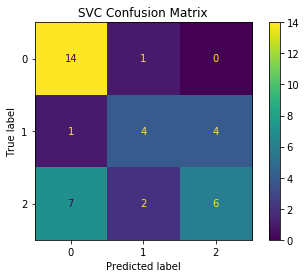

In [37]:
model_fit_score(models[1], samples[3], 5)

#### SVC | Random Sampling

Evaluation in 3.39 seconds
SVC Best params: {'svc__C': 100.0, 'svc__kernel': 'linear'}
SVC Best score: 0.4095238095238095
Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.75      0.60      0.67        15
           2       0.73      0.53      0.62        15

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.68        45
weighted avg       0.70      0.69      0.68        45



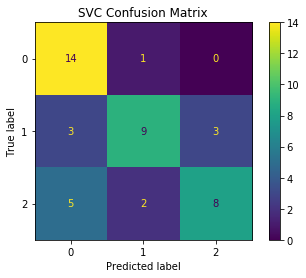

In [38]:
model_fit_score(models[1], samples[0], 5)

#### NuSVC | Original Data

Evaluation in 23.95 seconds
NuSVC Best params: {'nusvc__kernel': 'linear', 'nusvc__nu': 0.5799999999999997}
NuSVC Best score: 0.5157706093189964
Training Accuracy: 54%
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.67      0.44      0.53         9
           2       0.60      0.40      0.48        15

    accuracy                           0.62        39
   macro avg       0.63      0.59      0.58        39
weighted avg       0.62      0.62      0.59        39



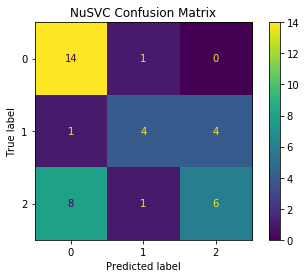

In [39]:
import warnings
warnings.filterwarnings("ignore")

model_fit_score(models[2], samples[3], 3)

#### NuSVC | Random Oversampling

Evaluation in 29.34 seconds
NuSVC Best params: {'nusvc__kernel': 'rbf', 'nusvc__nu': 0.6799999999999997}
NuSVC Best score: 0.5047619047619047
Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.42      0.53      0.47        15
           2       0.33      0.40      0.36        15

    accuracy                           0.36        45
   macro avg       0.33      0.36      0.34        45
weighted avg       0.33      0.36      0.34        45



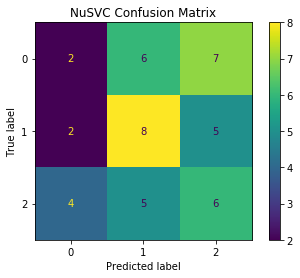

In [40]:
import warnings
warnings.filterwarnings("ignore")

model_fit_score(models[2], samples[0], 3)

#### Bayesian | Orignial Data

Evaluation in 0.11 seconds
Bayesian Best params: {'bayes__var_smoothing': 1e-06}
Bayesian Best score: 0.4827956989247311
Training Accuracy: 54%
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.67      0.22      0.33         9
           2       0.73      0.53      0.62        15

    accuracy                           0.62        39
   macro avg       0.65      0.56      0.55        39
weighted avg       0.65      0.62      0.58        39



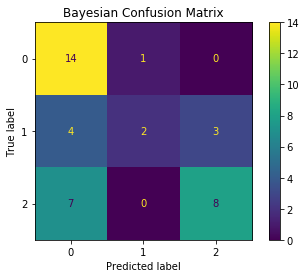

In [41]:
model_fit_score(models[3], samples[3], 3)

#### Bayesian | Random Oversampling

Evaluation in 0.11 seconds
Bayesian Best params: {'bayes__var_smoothing': 1e-08}
Bayesian Best score: 0.4666666666666666
Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.54      0.87      0.67        15
           1       0.50      0.33      0.40        15
           2       0.55      0.40      0.46        15

    accuracy                           0.53        45
   macro avg       0.53      0.53      0.51        45
weighted avg       0.53      0.53      0.51        45



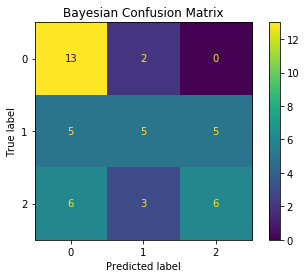

In [47]:
model_fit_score(models[3], samples[0], 3)

#### Random Forest | Original Data

Evaluation in 37.41 seconds
RandomForest Best params: {'rf__criterion': 'entropy', 'rf__max_depth': 80, 'rf__n_estimators': 30}
RandomForest Best score: 0.5602150537634408
Training Accuracy: 54%
              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.25      0.11      0.15         9
           2       0.40      0.40      0.40        15

    accuracy                           0.49        39
   macro avg       0.42      0.44      0.41        39
weighted avg       0.44      0.49      0.45        39



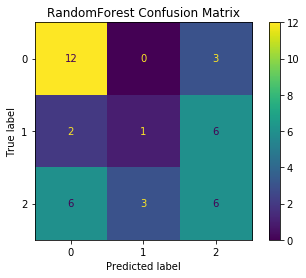

In [48]:
model_fit_score(models[4], samples[3], 3)

#### RandomForest | Random Oversampling

Evaluation in 47.32 seconds
RandomForest Best params: {'rf__criterion': 'gini', 'rf__max_depth': 60, 'rf__n_estimators': 30}
RandomForest Best score: 0.6190476190476191
Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.53      0.53      0.53        15
           2       0.36      0.33      0.34        15

    accuracy                           0.49        45
   macro avg       0.48      0.49      0.49        45
weighted avg       0.48      0.49      0.49        45



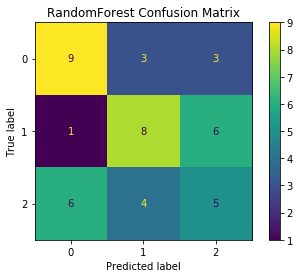

In [49]:
model_fit_score(models[4], samples[0], 3)

### Ensemble Learning

#### Voting Classifier

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
estimators = []

knn = KNeighborsClassifier(algorithm='auto', n_neighbors=31, weights='distance')
model1 = GridSearchCV(knn, param_grid={},cv=5)
estimators.append(('knn',model1))
svc = SVC(C=100, kernel='linear')
model2 = GridSearchCV(svc, param_grid={},cv=5)
estimators.append(('svc',model2))
nusvc = NuSVC(kernel='rbf', nu=0.6799999999999997)
model3 = GridSearchCV(nusvc, param_grid={},cv=3)
estimators.append(('nusvc',model3))
bayes = GaussianNB(var_smoothing=1e-08)
model4 = GridSearchCV(bayes, param_grid={},cv=5)
estimators.append(('bayes',model4))
rf = RandomForestClassifier(criterion='entropy', max_depth=60, n_estimators=90)
model5 = GridSearchCV(bayes, param_grid={},cv=3)
estimators.append(('rf',model5))

ensemble = VotingClassifier(estimators)

ensemblecv = GridSearchCV(ensemble, param_grid={}, cv=5)

In [53]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=21,stratify=y_res)

In [54]:
ensemblecv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('knn',
                                                     GridSearchCV(cv=5,
                                                                  error_score=nan,
                                                                  estimator=KNeighborsClassifier(algorithm='auto',
                                                                                                 leaf_size=30,
                                                                                                 metric='minkowski',
                                                                                                 metric_params=None,
                                                                                                 n_jobs=None,
                                                                                                 n_neighbors=31,
                                                                  

In [55]:
y_pred = ensemblecv.predict(X_test)
y_train_predict = clfcv.predict(X_train)

Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.69      0.60      0.64        15
           2       0.78      0.47      0.58        15

    accuracy                           0.64        45
   macro avg       0.68      0.64      0.64        45
weighted avg       0.68      0.64      0.64        45



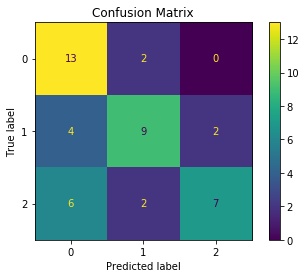

In [56]:
print("Training Accuracy: {}%".format(accuracy_score(y_train, y_train_predict, normalize=False)))
print(classification_report(y_test, y_pred, zero_division=0))
plot_confusion_matrix(ensemblecv, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

#### Bagging

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
clf = BaggingClassifier(base_estimator=SVC(C=100, kernel='linear'),n_estimators=100,random_state=21)
clfcv = GridSearchCV(clf, param_grid={})
clfcv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=SVC(C=100,
                                                            break_ties=False,
                                                            cache_size=200,
                                                            class_weight=None,
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3,
                                                            gamma='scale',
                                                            kernel='linear',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                                              

In [19]:
y_pred = clfcv.predict(X_test)
y_train_predict = clfcv.predict(X_train)

Training Accuracy: 59%
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.73      0.73      0.73        15
           2       0.88      0.47      0.61        15

    accuracy                           0.71        45
   macro avg       0.75      0.71      0.70        45
weighted avg       0.75      0.71      0.70        45



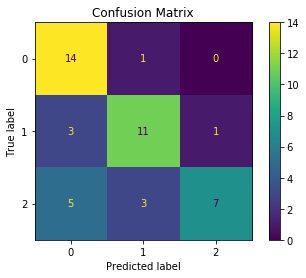

In [50]:
print("Training Accuracy: {}%".format(accuracy_score(y_train, y_train_predict, normalize=False)))
print(classification_report(y_test, y_pred, zero_division=0))
plot_confusion_matrix(clfcv, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()